integrate singel cell IBEX data

In [1]:
import os
import pandas as pd
os.chdir('ThymusSpatialAtlas/Figure_2_nat/')
import scanpy as sc
import anndata as ad
# import bbknn
import numpy as np
## For correct plotting of the images
import matplotlib
from matplotlib import rcParams
from matplotlib import font_manager
import matplotlib.pyplot as plt
rcParams['pdf.fonttype'] = 42
sc.settings.set_figure_params(dpi = 150, color_map = 'RdPu', dpi_save = 150, vector_friendly = True, format = 'pdf')
font_manager.fontManager.addfont("ThymusSpatialAtlas/software/Arial.ttf")
print(font_manager.findfont("Arial"))
plt.rcParams["font.sans-serif"] = ["Arial"]

/nfs/team205/ny1/ThymusSpatialAtlas/software/Arial.ttf


In [2]:
def concatenate_csv_files(directory):
    all_data = pd.DataFrame()
    renaming_mapping = {
    'HLA-DR_mean_intensity': 'HLADR_mean_intensity',
    'HLA-DR_max_intensity': 'HLADR_max_intensity', 
    'LYVE-1_mean_intensity':'LYVE1_mean_intensity' ,
    'LYVE-1_max_intensity':'LYVE1_max_intensity' ,
    'CHROMOGRANIN_A_mean_intensity': 'CHGA_mean_intensity',
    'CHROMOGRANIN_A_max_intensity': 'CHGA_max_intensity',
    'BETA-TUBULIN_3_mean_intensity': 'TUBB3_mean_intensity',
    'BETA-TUBULIN_3_max_intensity': 'TUBB3_max_intensity',
    'AQUAPORIN_1_mean_intensity': 'AQP1_mean_intensity',
    'AQUAPORIN_1_max_intensity': 'AQP1_max_intensity',
    'KI-67_mean_intensity': 'KI67_mean_intensity',
    'KI-67_max_intensity': 'KI67_max_intensity',
    'TCR_GAMMA/DELTA_mean_intensity': 'TCRGD_mean_intensity',
    'TCR_GAMMA/DELTA_max_intensity': 'TCRGD_max_intensity',
    'ALPHA_SMOOTH_MUSCLE_ACTIN_mean_intensity': 'ASMA_mean_intensity',
    'ALPHA_SMOOTH_MUSCLE_ACTIN_max_intensity': 'ASMA_max_intensity',
    'PAN-CYTOKERATIN_mean_intensity': 'PANCYTO_mean_intensity',
    'PAN-CYTOKERATIN_max_intensity': 'PANCYTO_max_intensity',
    'BETATUB3_mean_intensity': 'TUBB3_mean_intensity',
    'BETATUB3_max_intensity': 'TUBB3_max_intensity',
    'BETATUBULIN3_mean_intensity': 'TUBB3_mean_intensity',
    'BETATUBULIN3_max_intensity': 'TUBB3_max_intensity',
    'MASKED_FOXP3_mean_intensity': 'FOXP3_mean_intensity',
    'MASKED_FOXP3_max_intensity': 'FOXP3_max_intensity',
    'CD8A_mean_intensity': 'CD8_mean_intensity',
    'CD8A_max_intensity': 'CD8_max_intensity',
    'BETA_TUB3_mean_intensity': 'TUBB3_mean_intensity',
    'BETA_TUB3_max_intensity': 'TUBB3_max_intensity',
    'SYNAPTOPHYSIN_mean_intensity': 'SYP_mean_intensity',
    'SYNAPTOPHYSIN_max_intensity': 'SYP_max_intensity',
    'SYNAPTOPHYSIN_D_mean_intensity': 'SYP_mean_intensity',
    'SYNAPTOPHYSIN_D_max_intensity': 'SYP_max_intensity',
    'PANCYTOKERATIN_mean_intensity': 'PANCYTO_mean_intensity',
    'PANCYTOKERATIN_max_intensity': 'PANCYTO_max_intensity',
    'TCR_GD_mean_intensity':'TCRGD_mean_intensity',
    'TCR_GD_max_intensity':'TCRGD_max_intensity',
    'PAN_CYTOKERATIN_mean_intensity': 'PANCYTO_mean_intensity',
    'PAN_CYTOKERATIN_max_intensity': 'PANCYTO_max_intensity',
    'ANNEXIN_I_mean_intensity': 'ANNEXIN1_mean_intensity',
    'ANNEXIN_I_max_intensity': 'ANNEXIN1_max_intensity',
    'ANNEXIN_1_mean_intensity': 'ANNEXIN1_mean_intensity',
    'ANNEXIN_1_max_intensity': 'ANNEXIN1_max_intensity',
    # 'CD15_0_mean_intensity': 'CD15_mean_intensity',
    # 'CD15_0_max_intensity': 'CD15_max_intensity',
}

    

    # Walk through directory
    for dirpath, dirnames, filenames in os.walk(directory):
        for filename in filenames:
            # Check if file is the target CSV file
            if filename == 'channel_data_3d_anno.csv':
                file_path = os.path.join(dirpath, filename)

                # Load CSV file into DataFrame
                data = pd.read_csv(file_path)

                # Rename columns
                data = data.rename(columns=renaming_mapping)
                
                # Add 'sample' column with the parent directory name
                data['sample'] = os.path.basename(dirpath)
                
                 # Generate a new index by concatenating 'sample', 'spot_id' and the original row index
                data['index'] = data.apply(lambda row: f"{row['sample']}_{row['label']}_{row.name}", axis=1)
                data.set_index('index', inplace=True)


                # Concatenate DataFrame along rows
                all_data = pd.concat([all_data, data], axis=0)

    return all_data

# Replace with your directory path
directory = 'IBEX/Thymus/'
all_data = concatenate_csv_files(directory)

# Save to a new CSV file
all_data.to_csv('all_data.csv', index=False)

print("All data has been concatenated and saved to all_data.csv.")

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
non_null_counts = all_data.groupby('sample').count()
plt.figure(figsize=(20,80))
sns.heatmap(non_null_counts.T, cmap='viridis', linewidths=.5)
plt.title('Non-null values in each column per sample')
plt.xlabel('Sample')
plt.ylabel('Column')
plt.savefig('marker_compositionsingle_cells.pdf')
plt.show()

In [ ]:
import pandas as pd
import numpy as np

# Meta columns
meta_cols = ['label','y','x','Unnamed: 0.1', 'Unnamed: 0', 'sample', 'annotation_lv_0', 'annotation_lv_0_number', 'annotation_lv_1', 'annotation_lv_1_number',  'L2_dist_annotation_lv_0_Cortex', 'L2_dist_annotation_lv_0_Edge', 'L2_dist_annotation_lv_0_Medulla', 'L2_dist_annotation_lv_1_HS', 'L2_dist_annotation_lv_1_Other', 'L2_dist_annotation_lv_1_PVS', 'L2_dist_annotation_lv_1_Vessels', 'L2_dist_annotation_lv_1_unassigned', 'cma_v2', 'manual_bin_cma_v2', 'manual_bin_cma_v2_int']

# Intensity columns
intensity_cols = [col for col in all_data.columns if col.endswith('mean_intensity') or col.endswith('max_intensity')]
all_data = all_data[all_data['annotation_lv_0']!='unassigned']
all_data = all_data[all_data['annotation_lv_0']!='Artifacts']

adata_ibex = ad.AnnData(X= all_data.loc[:,intensity_cols],obs=all_data.loc[:,meta_cols],)

adata_ibex.var.index = adata_ibex.var.index.str.replace('_intensity', '')
# Get the list of gene names that does not contain the strings "max", "intensity", and "Hoechst"
genes_to_keep = [gene for gene in adata_ibex.var_names 
                 if all(x not in gene for x in ['max', 'HOECHST'])]

# Subset the AnnData object to only include the genes in genes_to_keep
adata_ibex = adata_ibex[:, genes_to_keep]
adata_ibex.layers['counts'] = adata_ibex.X
adata_ibex

In [10]:
list(adata_ibex.obs.columns)

['label',
 'y',
 'x',
 'Unnamed: 0.1',
 'Unnamed: 0',
 'sample',
 'annotation_lv_0',
 'annotation_lv_0_number',
 'annotation_lv_1',
 'annotation_lv_1_number',
 'L2_dist_annotation_lv_0_Cortex',
 'L2_dist_annotation_lv_0_Edge',
 'L2_dist_annotation_lv_0_Medulla',
 'L2_dist_annotation_lv_1_HS',
 'L2_dist_annotation_lv_1_Other',
 'L2_dist_annotation_lv_1_PVS',
 'L2_dist_annotation_lv_1_Vessels',
 'L2_dist_annotation_lv_1_unassigned',
 'cma_v2',
 'manual_bin_cma_v2',
 'manual_bin_cma_v2_int']

In [14]:
# Convert to a dense matrix if it's not already
adata_ibex.X = np.nan_to_num(adata_ibex.X)
sc.pp.filter_genes(adata_ibex,min_cells=500000)
adata_ibex.var_names

Index(['nuclear_mean', 'CHGA_mean', 'CD99_mean', 'CD163_mean', 'CD11C_mean',
       'CD8_mean', 'CD3_mean', 'CD5_mean', 'CD20_mean', 'CD34_mean',
       'CD7_mean', 'CD31_mean', 'CD39_mean', 'CD4_mean', 'VA7.2_mean',
       'TUBB3_mean', 'CD206_mean', 'SPARC_mean', 'LAMIN_A_mean', 'HLADR_mean',
       'CD123_mean', 'DEC205_mean', 'AQP1_mean', 'KI67_mean', 'AIRE_mean',
       'CD49A_mean', 'KERATIN_10_mean', 'KERATIN_15_mean', 'LUMICAN_mean',
       'LYVE1_mean', 'VIMENTIN_mean', 'KERATIN_14_mean', 'ANNEXIN1_mean',
       'CD15_mean', 'CD45_mean', 'SYP_mean', 'TCRGD_mean', 'KERATIN_8_mean',
       'PANCYTO_mean', 'ASMA_mean', 'KERATIN_5_mean', 'FOXP3_mean',
       'DESMIN_mean', 'CD49F_mean'],
      dtype='object')

In [15]:
# add metadta 
import pandas as pd

# Load metadata from CSV file
metadata = pd.read_csv('')

# Set 'sample' column as index
metadata.set_index('SangerID', inplace=True)
metadata

# merge new annotations
adata_ibex.obs = adata_ibex.obs.join(metadata, on='sample')
adata_ibex

AnnData object with n_obs × n_vars = 1101631 × 44
    obs: 'label', 'y', 'x', 'Unnamed: 0.1', 'Unnamed: 0', 'sample', 'annotation_lv_0', 'annotation_lv_0_number', 'annotation_lv_1', 'annotation_lv_1_number', 'L2_dist_annotation_lv_0_Cortex', 'L2_dist_annotation_lv_0_Edge', 'L2_dist_annotation_lv_0_Medulla', 'L2_dist_annotation_lv_1_HS', 'L2_dist_annotation_lv_1_Other', 'L2_dist_annotation_lv_1_PVS', 'L2_dist_annotation_lv_1_Vessels', 'L2_dist_annotation_lv_1_unassigned', 'cma_v2', 'manual_bin_cma_v2', 'manual_bin_cma_v2_int', 'Sample', 'Alt. ID', 'Age', 'Age_Numeric', 'Sex'
    var: 'n_cells'
    uns: 'annotation_lv_0_colors', 'annotation_lv_1_colors'
    layers: 'counts'

# plot individual sample composition in umap and PCA space 

In [2]:
os.chdir('ThymusSpatialAtlas/Figure_2_nat/')
adata_ibex = sc.read_h5ad('')
adata_ibex

AnnData object with n_obs × n_vars = 1101631 × 44
    obs: 'label', 'y', 'x', 'Unnamed: 0.1', 'Unnamed: 0', 'sample', 'annotation_lv_0', 'annotation_lv_0_number', 'annotation_lv_1', 'annotation_lv_1_number', 'L2_dist_annotation_lv_0_Cortex', 'L2_dist_annotation_lv_0_Edge', 'L2_dist_annotation_lv_0_Medulla', 'L2_dist_annotation_lv_1_HS', 'L2_dist_annotation_lv_1_Other', 'L2_dist_annotation_lv_1_PVS', 'L2_dist_annotation_lv_1_Vessels', 'L2_dist_annotation_lv_1_unassigned', 'cma_v2', 'manual_bin_cma_v2', 'manual_bin_cma_v2_int', 'Sample', 'Alt. ID', 'Age', 'Age_Numeric', 'Sex'
    var: 'n_cells'
    uns: 'annotation_lv_0_colors', 'annotation_lv_1_colors'
    layers: 'counts'

In [5]:
adata_ibex.obs['annotation_lv_1'] = adata_ibex.obs['annotation_lv_1'].astype('object')
adata_ibex.obs.loc[adata_ibex.obs['annotation_lv_1']=='HS','annotation_lv_1'] = 'HC'
adata_ibex.obs['annotation_lv_1'] = adata_ibex.obs['annotation_lv_1'].astype('category')

adata_ibex.obs['annotation_lv_1'] = adata_ibex.obs['annotation_lv_1'].astype('object')
adata_ibex.obs.loc[adata_ibex.obs['annotation_lv_1']=='Vessels','annotation_lv_1'] = 'vessels'
adata_ibex.obs['annotation_lv_1'] = adata_ibex.obs['annotation_lv_1'].astype('category')

htsa_colors = pd.read_csv('ThymusSpatialAtlas/Figure_2_nat/figures/hsta_colormap.csv')
htsa_colors = htsa_colors.append({'structure': 'Fat', 'color_names': 'Cyclamen', 'color_map': '#ff6699'}, ignore_index=True)
htsa_colors = htsa_colors.set_index('structure')
htsa_colors

# map the colors to the categories
categories = adata_ibex.obs['annotation_lv_0'].cat.categories
colors = []
for cat in categories:
    try:
        colors.append(htsa_colors['color_map'][cat])
    except KeyError:  # cat is not found in colors_dict
        colors.append('gray')  # use a default color

# assign the colors
adata_ibex.uns['annotation_lv_0_colors'] = colors

# map the colors to the categories
categories = adata_ibex.obs['annotation_lv_1'].cat.categories

colors = []
for cat in categories:
    try:
        colors.append(htsa_colors['color_map'][cat])
    except KeyError:  # cat is not found in colors_dict
        colors.append('gray')  # use a default color

# assign the colors
adata_ibex.uns['annotation_lv_1_colors'] = colors
os.chdir('ThymusSpatialAtlas/software/ImageSpot/')
import imagespot_rev_v1 as ims

/tmp/ipykernel_2726379/3953801348.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  htsa_colors = htsa_colors.append({'structure': 'Fat', 'color_names': 'Cyclamen', 'color_map': '#ff6699'}, ignore_index=True)


In [21]:
sc.set_figure_params(figsize=[4,4],fontsize=10,dpi=100)
os.chdir('ThymusSpatialAtlas/Figure_2_nat/')

cumul_pca = {}
for s in np.unique(adata_ibex.obs['sample']):
    adata = adata_ibex[adata_ibex.obs['sample']==s].copy()
    sc.pp.scale(adata)
    sc.pp.normalize_per_cell(adata)
    adata.X = np.nan_to_num(adata.X)
    sc.pp.pca(adata)
    sc.pl.pca(adata, color = ['cma_v2','annotation_lv_0','annotation_lv_1']
           , title = s, frameon = False, cmap = 'gist_rainbow',save='_IBEX_sc_sample_id'+s+'.pdf',s=1,vmin=-0.8,vmax=0.8)
    cumul_pca[s] = ims.cumulative_pca(adata,obs='cma_v2',ncomps=10)
    print(np.sum(cumul_pca[s])/10)

    

In [7]:
# Convert cumul_pca to a DataFrame, calculate the metric
sample_info = adata_ibex.obs[['sample', 'Age_Numeric']].drop_duplicates().set_index('sample')

df_pca = pd.DataFrame(cumul_pca).T  # Transpose to have samples as rows
df_pca['Metric'] = df_pca.sum(axis=1) / 10  # Calculate the sum or average of your metrics for each sample

# Merge the PCA metrics with the sample information
df_merged = df_pca.merge(sample_info, left_index=True, right_index=True)
df_sorted = df_merged.sort_values(by=['Age_Numeric'])
df_sorted.index = df_sorted.index.astype(str)

df_sorted['Age_Numeric'] = (df_sorted['Age_Numeric']).astype(str)

df_sorted['PlotLabel'] = 'Sample ID: '+ df_sorted.index + ' | Age (months): ' + df_sorted['Age_Numeric'] 

plt.figure(figsize=(12, 8))
plt.bar(df_sorted['PlotLabel'], height=df_sorted['Metric'])
plt.xticks(rotation=90)
plt.xlabel('Sample ID | Age (months)')
plt.ylabel('Average Metric')
plt.title('Sample Variability by Age')
plt.tight_layout()
plt.ylim(0,60)

plt.savefig('figures/PCA_IBEX_sample_variability_plot.pdf')



plt.show()

In [10]:
df_sorted.to_csv('ThymusSpatialAtlas/SourceData/source_data_edf3_c_ibex.csv')

In [ ]:
sc.set_figure_params(figsize=[4,4],fontsize=10,dpi=100)
os.chdir('ThymusSpatialAtlas/Figure_2_nat/')

for s in np.unique(adata_ibex.obs['sample']):
    adata = adata_ibex[adata_ibex.obs['sample']==s].copy()
    sc.pp.scale(adata)
    sc.pp.neighbors(adata)
    sc.tl.umap(adata)
    sc.pl.umap(adata, color = ['cma_v2','annotation_lv_0','annotation_lv_1'], title = s, frameon = False, cmap = 'gist_rainbow',save='_IBEX_sample_id'+s+'.pdf',s=1,vmin=-0.8,vmax=0.8)
    

# correlations with axis 

In [12]:
def subset_by_anno(adata, cluster_key , target_cells=20000):
    adatas = [adata[adata.obs[cluster_key] == clust].copy() for clust in adata.obs[cluster_key].cat.categories]
    for dat in adatas:
        if dat.n_obs > target_cells:
            sc.pp.subsample(dat, n_obs=target_cells)
    adata_sub = adatas[0].concatenate(*adatas[1:])
    return adata_sub

In [426]:
# sc.pp.subsample(adata_ibex, fraction=0.2)
adata_ibex = sc.read_h5ad('')
adata_ibex

AnnData object with n_obs × n_vars = 1101631 × 44
    obs: 'label', 'y', 'x', 'Unnamed: 0.1', 'Unnamed: 0', 'sample', 'annotation_lv_0', 'annotation_lv_0_number', 'annotation_lv_1', 'annotation_lv_1_number', 'L2_dist_annotation_lv_0_Cortex', 'L2_dist_annotation_lv_0_Edge', 'L2_dist_annotation_lv_0_Medulla', 'L2_dist_annotation_lv_1_HS', 'L2_dist_annotation_lv_1_Other', 'L2_dist_annotation_lv_1_PVS', 'L2_dist_annotation_lv_1_Vessels', 'L2_dist_annotation_lv_1_unassigned', 'cma_v2', 'manual_bin_cma_v2', 'manual_bin_cma_v2_int', 'Sample', 'Alt. ID', 'Age', 'Age_Numeric', 'Sex'
    var: 'n_cells'
    uns: 'annotation_lv_0_colors', 'annotation_lv_1_colors'
    layers: 'counts'

In [66]:
# batch correction
adata_ibex.obs['Age_Numeric'] = adata_ibex.obs['Age_Numeric'].astype('float')
sc.pp.combat(adata_ibex, key='sample', inplace=True)
sc.pp.scale(adata_ibex)
adata_ibex

AnnData object with n_obs × n_vars = 1101631 × 44
    obs: 'label', 'y', 'x', 'Unnamed: 0.1', 'Unnamed: 0', 'sample', 'annotation_lv_0', 'annotation_lv_0_number', 'annotation_lv_1', 'annotation_lv_1_number', 'L2_dist_annotation_lv_0_Cortex', 'L2_dist_annotation_lv_0_Edge', 'L2_dist_annotation_lv_0_Medulla', 'L2_dist_annotation_lv_1_HS', 'L2_dist_annotation_lv_1_Other', 'L2_dist_annotation_lv_1_PVS', 'L2_dist_annotation_lv_1_Vessels', 'L2_dist_annotation_lv_1_unassigned', 'cma_v2', 'manual_bin_cma_v2', 'manual_bin_cma_v2_int', 'Sample', 'Alt. ID', 'Age', 'Age_Numeric', 'Sex'
    var: 'n_cells', 'mean', 'std'
    uns: 'annotation_lv_0_colors', 'annotation_lv_1_colors'
    layers: 'counts'

In [67]:
sc.pp.neighbors(adata_ibex,n_neighbors=25)

In [ ]:
sc.tl.umap(adata_ibex)

In [6]:
# adata_ibex.write_h5ad('ThymusSpatialAtlas/Figure_2_nat/adata_sc_IBEX_umap.h5ad')
adata_ibex = sc.read_h5ad('ThymusSpatialAtlas/Figure_2_nat/adata_sc_IBEX_umap.h5ad')
adata_ibex_raw = sc.read_h5ad('ThymusSpatialAtlas/Figure2/adata_sc_IBEX.h5ad')
adata_ibex_raw.obs['total_counts'] = np.sum(adata_ibex_raw.X,axis=1)
adata_ibex.obs['total_counts'] = adata_ibex_raw.obs['total_counts']

# adata_ibex.obs['total_counts'] = np.sum(adata_ibex.X,axis=1)

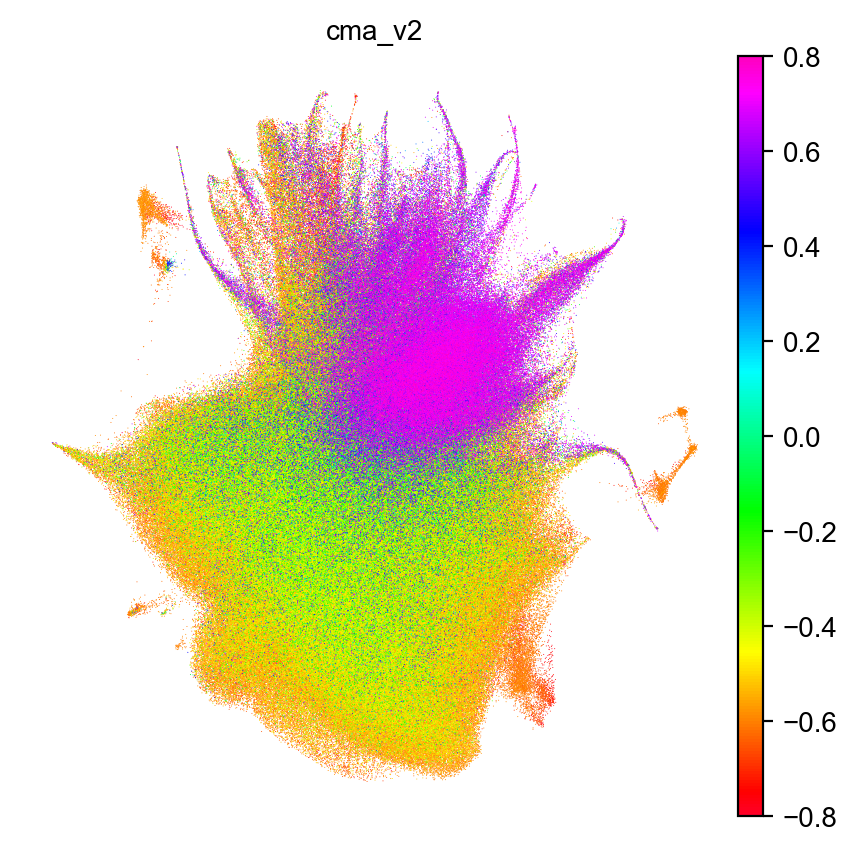

In [105]:
# plot umap 
sc.set_figure_params(figsize=[5,5],fontsize=10,dpi=100)
sc.pl.umap(adata_ibex, color = ['cma_v2'],s=0.5, frameon = False, cmap = 'gist_rainbow',save='_sc_IBEX_cma_v2.pdf',vmin=-0.8,vmax=0.8)


In [ ]:
sc.set_figure_params(figsize=[5,5],fontsize=10,dpi=150)
sc.pl.umap(adata_ibex, color = ['sample']
           , frameon = False, cmap = 'viridis',save='_IBEX_cs_meta_data.pdf',s=0.25,)

In [ ]:
sc.pl.umap(adata_ibex, color = ['annotation_lv_1']
           , frameon = False, groups=['HC','PVS','vessels'],s=1,save='_IBEX_sc_annotations_level_1.pdf')

In [ ]:
sc.set_figure_params(figsize=[5,5],fontsize=10,dpi=200)

sc.pl.umap(adata_ibex, color = ['annotation_lv_0']
           , frameon = False,s=0.5,save='_IBEX_sc_annotations_level_0.pdf')

In [15]:
sc.set_figure_params(figsize=[5,5],fontsize=10,dpi=150)
sc.pl.umap(adata_ibex, color = ['L2_dist_annotation_lv_0_Edge','L2_dist_annotation_lv_0_Cortex']
           , frameon = False, cmap = 'jet',vmin=0,vmax=150,save='_IBEX_sc_dist_edge_cortex_300.pdf',s=0.1)

# perform PCA and remove outlier cells

In [13]:
# new bit
adata_ibex = sc.read_h5ad('ThymusSpatialAtlas/Figure2/adata_sc_IBEX.h5ad')
adata_ibex.obs['total_counts'] = np.sum(adata_ibex.X,axis=1)
adata_ibex = subset_by_anno(adata_ibex, 'sample' , target_cells=100000)
adata_ibex
# filter and batch correct ibex data 
adata_ibex = adata_ibex[adata_ibex.obs['manual_bin_cma_v2'].dropna().index]
adata_ibex.X = np.nan_to_num(adata_ibex.X, nan=0)
sc.pp.combat(adata_ibex, key='sample', inplace=True) # batch correct 
adata_ibex.X = np.nan_to_num(adata_ibex.X, nan=0)
adata_ibex

AnnData object with n_obs × n_vars = 764448 × 44
    obs: 'label', 'y', 'x', 'Unnamed: 0.1', 'Unnamed: 0', 'sample', 'annotation_lv_0', 'annotation_lv_0_number', 'annotation_lv_1', 'annotation_lv_1_number', 'L2_dist_annotation_lv_0_Cortex', 'L2_dist_annotation_lv_0_Edge', 'L2_dist_annotation_lv_0_Medulla', 'L2_dist_annotation_lv_1_HS', 'L2_dist_annotation_lv_1_Other', 'L2_dist_annotation_lv_1_PVS', 'L2_dist_annotation_lv_1_Vessels', 'L2_dist_annotation_lv_1_unassigned', 'cma_v2', 'manual_bin_cma_v2', 'manual_bin_cma_v2_int', 'Sample', 'Alt. ID', 'Age', 'Age_Numeric', 'Sex', 'total_counts', 'batch'
    var: 'n_cells'
    layers: 'counts'

In [14]:
sc.pp.filter_cells(adata_ibex,min_genes=10)
sc.pp.filter_cells(adata_ibex,min_counts=150) # scaled counts 
# sc.pp.filter_cells(adata_ibex,min_genes=10)
sc.pp.normalize_total(adata_ibex) 
# adata_ibex.X = np.nan_to_num(adata_ibex.X)
sc.pp.pca(adata_ibex, n_comps = 10)
adata_ibex

AnnData object with n_obs × n_vars = 524423 × 44
    obs: 'label', 'y', 'x', 'Unnamed: 0.1', 'Unnamed: 0', 'sample', 'annotation_lv_0', 'annotation_lv_0_number', 'annotation_lv_1', 'annotation_lv_1_number', 'L2_dist_annotation_lv_0_Cortex', 'L2_dist_annotation_lv_0_Edge', 'L2_dist_annotation_lv_0_Medulla', 'L2_dist_annotation_lv_1_HS', 'L2_dist_annotation_lv_1_Other', 'L2_dist_annotation_lv_1_PVS', 'L2_dist_annotation_lv_1_Vessels', 'L2_dist_annotation_lv_1_unassigned', 'cma_v2', 'manual_bin_cma_v2', 'manual_bin_cma_v2_int', 'Sample', 'Alt. ID', 'Age', 'Age_Numeric', 'Sex', 'total_counts', 'batch', 'n_genes', 'n_counts'
    var: 'n_cells'
    uns: 'pca'
    obsm: 'X_pca'
    varm: 'PCs'
    layers: 'counts'

-0.34027607005767285
-0.0856392312657468
0.3141637201820862
-0.3295132020331062
0.27082927091258047
-0.07161880733473315
0.03899977240366354
-0.010117154760997237
0.038113853170808204
0.0215475550283782


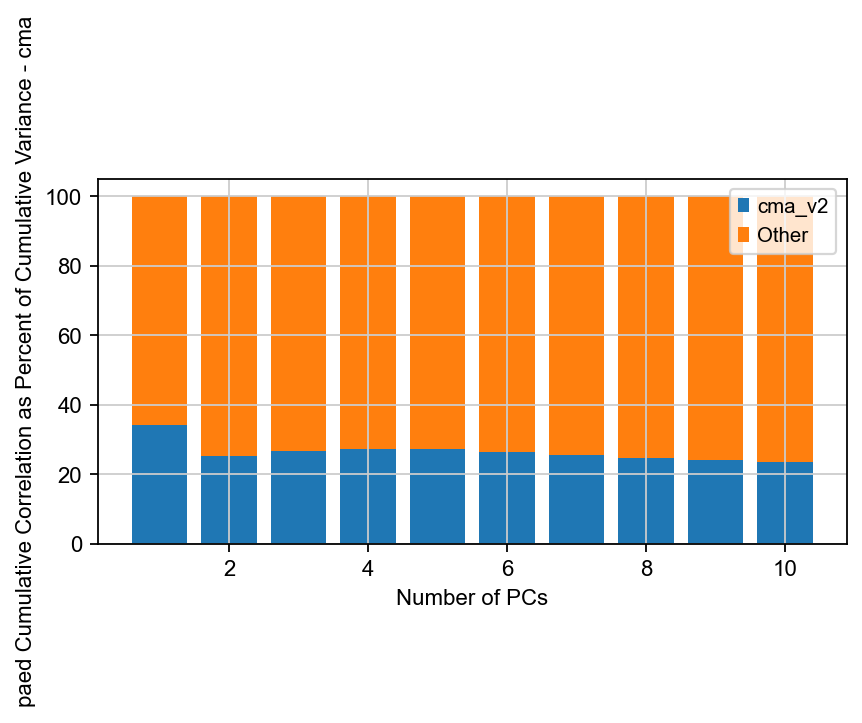

In [15]:
import matplotlib.pyplot as plt
from scipy.stats import spearmanr

sc.set_figure_params(figsize=[6,3],fontsize=10)

# Define the observation name
obs_name1 = "cma_v2"  # replace with your observation name

# Get the values of the observation
obs_values1 = adata_ibex.obs[obs_name1]
obs_values1

# Initialize variables to store the cumulative correlation and variance
cumulative_corr1 = 0
cumulative_variance = 0

# Initialize lists to store cumulative correlation as percent of cumulative variance
cum_corr_pct1 = []

# Calculate correlation with each PC
for i in range(10):
    pc_values = adata_ibex.obsm['X_pca'][:, i]

    # Pearson correlation
    corr1, _ = spearmanr(obs_values1, pc_values)

    # Get variance explained by this PC
    explained_variance = adata_ibex.uns['pca']['variance_ratio'][i]
    print(corr1)

    # Add weighted correlation and variance to cumulative measures
    cumulative_corr1 += np.abs(corr1) * explained_variance
    cumulative_variance += explained_variance

    # Store cumulative correlation as percent of cumulative variance
    cum_corr_pct1.append(100*cumulative_corr1/cumulative_variance)

# Create a stacked bar plot
plt.bar(range(1, 11), cum_corr_pct1, label=obs_name1)
plt.bar(range(1, 11), [100 - pct for pct in cum_corr_pct1], bottom=cum_corr_pct1, label='Other')
plt.xlabel('Number of PCs')
plt.ylabel('paed Cumulative Correlation as Percent of Cumulative Variance - cma')
plt.legend()

# Save the plot
# plt.savefig('figures/ibex_cumulative_correlation_plot_cma.pdf', dpi=100)

plt.show()

In [16]:
coor = dict()
coor['cma'] = cum_corr_pct1

-0.216163443161572
0.08736416736171321
-0.0005758718803771884
-0.1240375511350071
-0.02220052613640434
0.1282250018444021
0.1096132881492162
-0.09024335527356267
0.04647935931530709
-0.008001670807277855


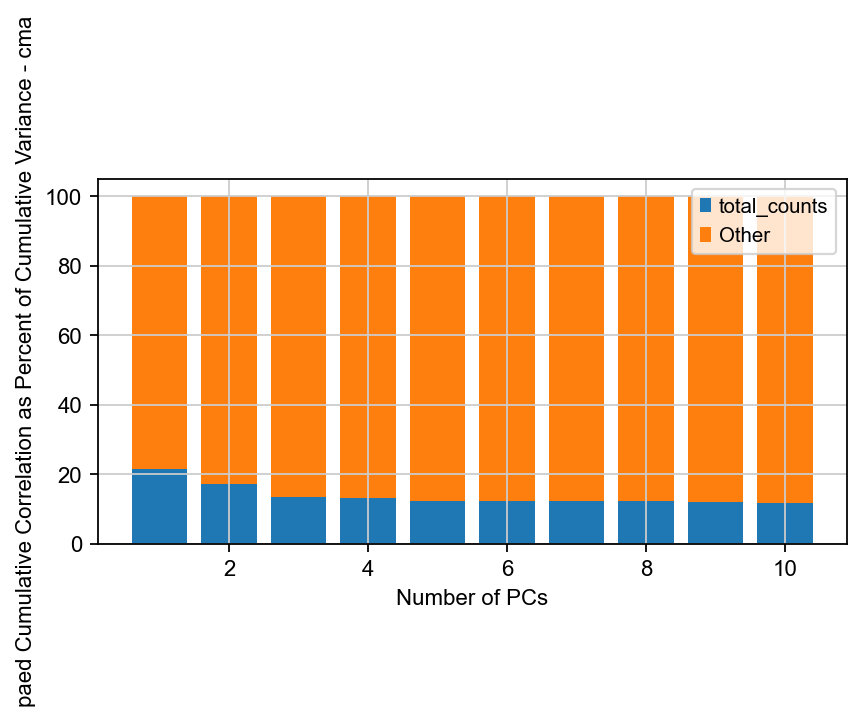

In [17]:
import matplotlib.pyplot as plt
from scipy.stats import spearmanr

sc.set_figure_params(figsize=[6,3],fontsize=10)

# Define the observation name
obs_name1 = "total_counts"  # replace with your observation name

# Get the values of the observation
obs_values1 = adata_ibex.obs[obs_name1]
obs_values1

# Initialize variables to store the cumulative correlation and variance
cumulative_corr1 = 0
cumulative_variance = 0

# Initialize lists to store cumulative correlation as percent of cumulative variance
cum_corr_pct1 = []

# Calculate correlation with each PC
for i in range(10):
    pc_values = adata_ibex.obsm['X_pca'][:, i]

    # Pearson correlation
    corr1, _ = spearmanr(obs_values1, pc_values)

    # Get variance explained by this PC
    explained_variance = adata_ibex.uns['pca']['variance_ratio'][i]
    print(corr1)

    # Add weighted correlation and variance to cumulative measures
    cumulative_corr1 += np.abs(corr1) * explained_variance
    cumulative_variance += explained_variance

    # Store cumulative correlation as percent of cumulative variance
    cum_corr_pct1.append(100*cumulative_corr1/cumulative_variance)

# Create a stacked bar plot
plt.bar(range(1, 11), cum_corr_pct1, label=obs_name1)
plt.bar(range(1, 11), [100 - pct for pct in cum_corr_pct1], bottom=cum_corr_pct1, label='Other')
plt.xlabel('Number of PCs')
plt.ylabel('paed Cumulative Correlation as Percent of Cumulative Variance - cma')
plt.legend()

# Save the plot
# plt.savefig('figures/ibex_cumulative_correlation_plot.pdf', dpi=100)

plt.show()

In [18]:
coor['total_counts'] = cum_corr_pct1
pd.DataFrame(coor).to_csv('')

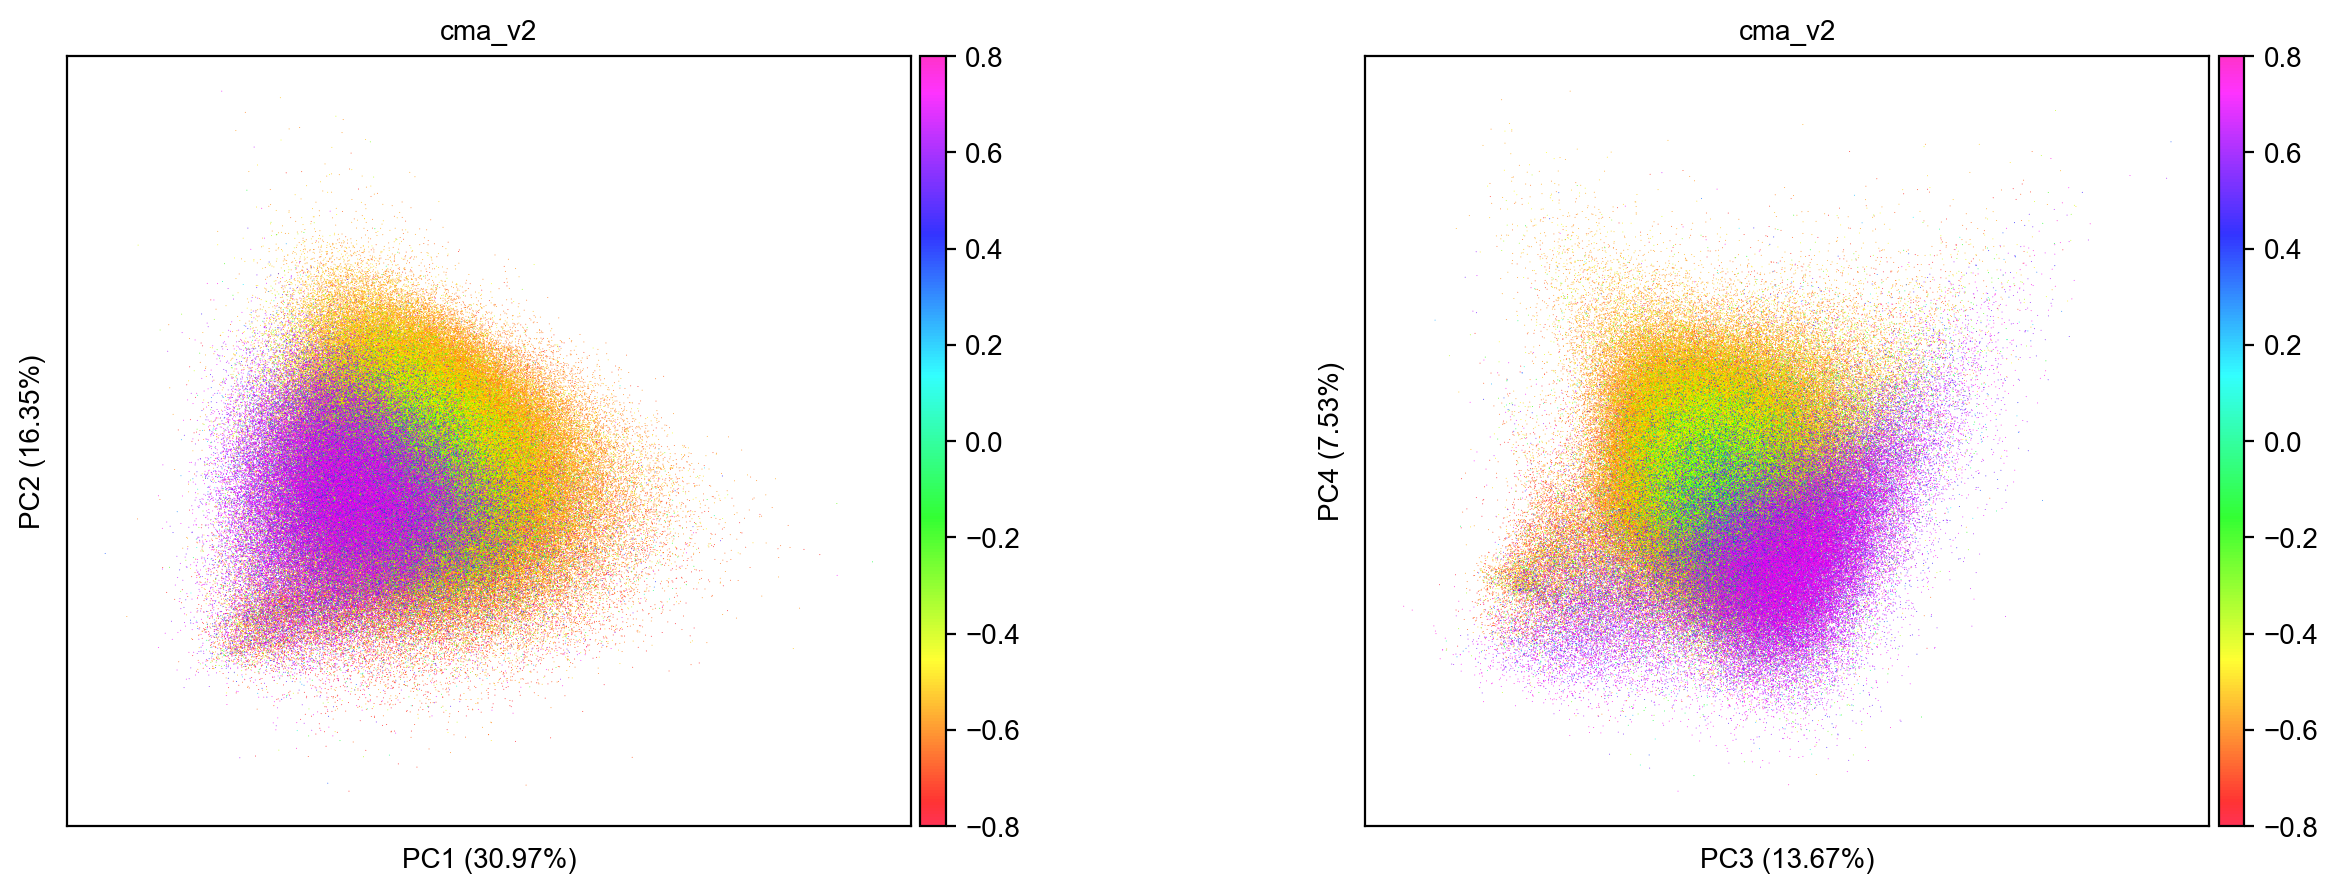

In [491]:
# # plot pca 
sc.set_figure_params(figsize=[5,5],fontsize=10,dpi=100)

sc.pl.pca(adata_ibex, components = ['1,2', '3,4'], color = ['cma_v2'], ncols = 2, cmap = "gist_rainbow",s=0.5,alpha=0.8,annotate_var_explained=True,vmin=-0.8,vmax=0.8,wspace=0.4,save='PCA_corrected_IBEX_sc_cma_v2.pdf')

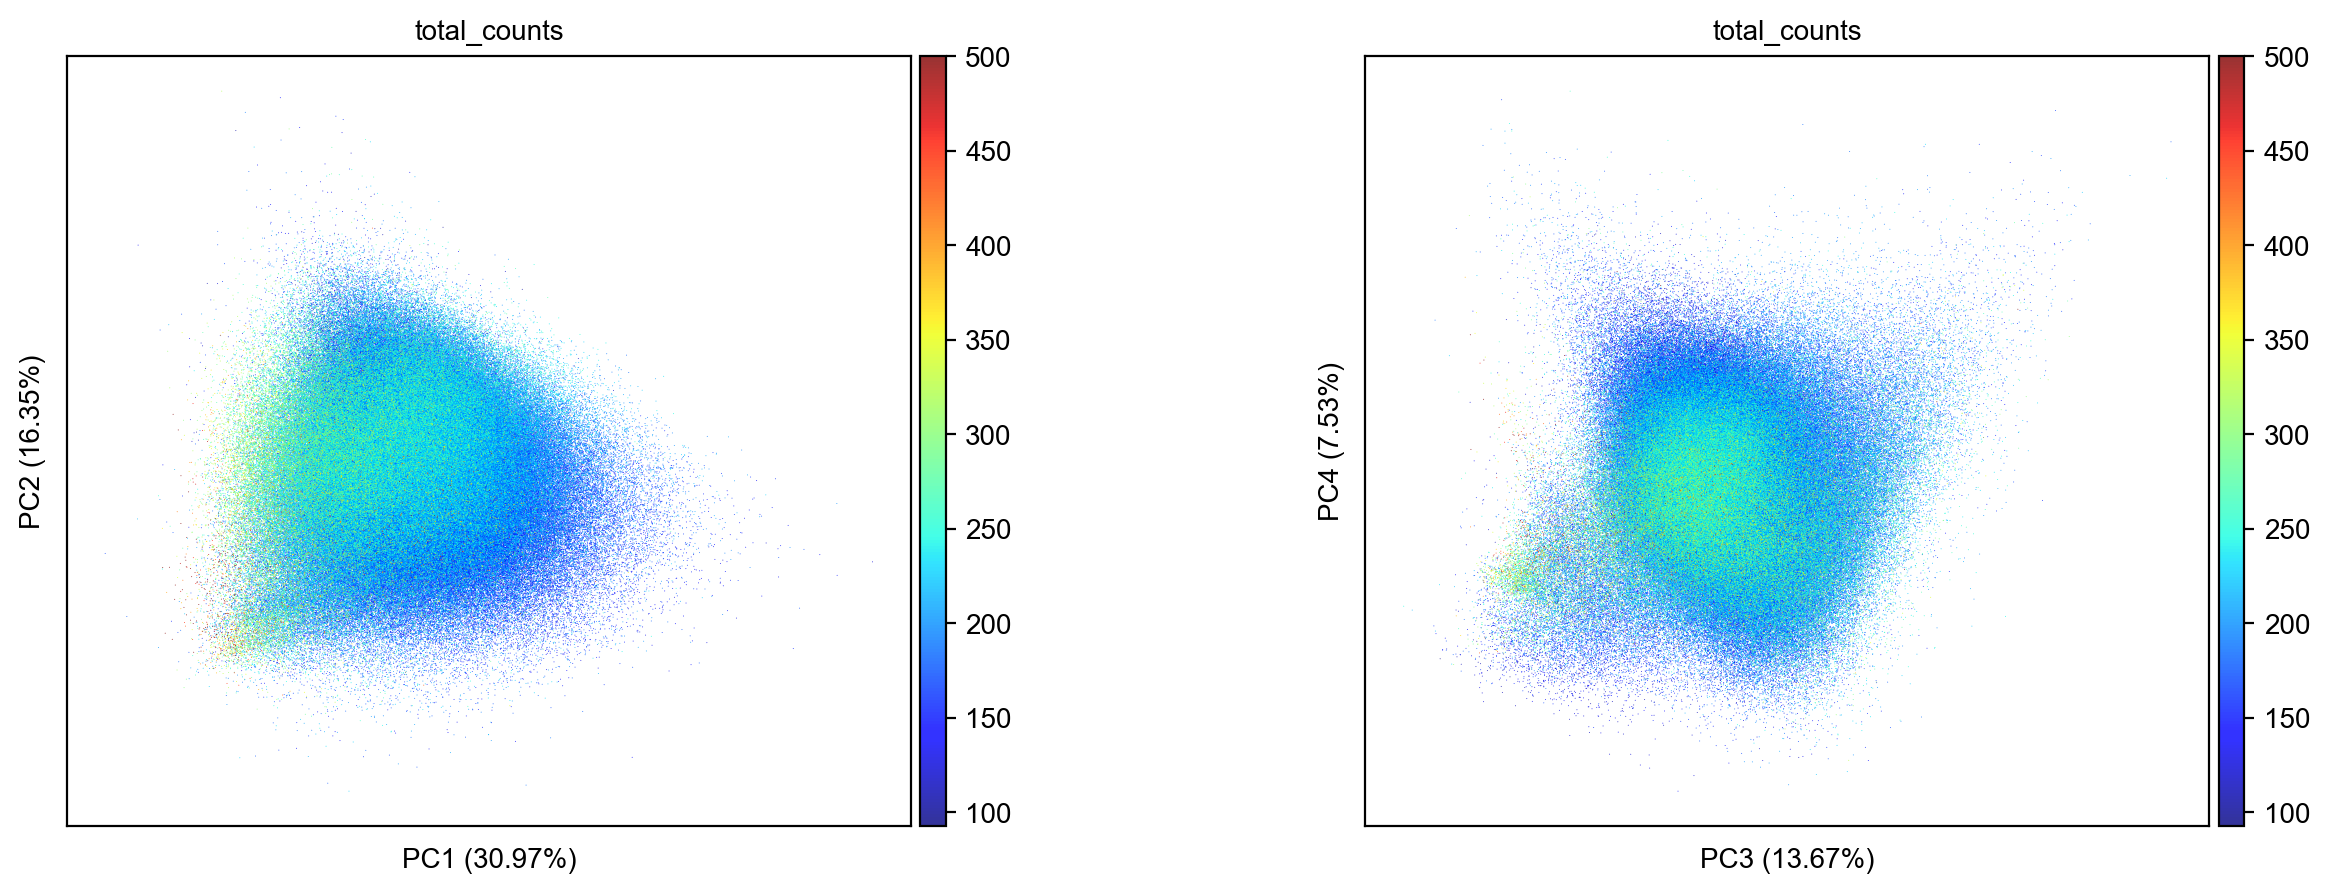

In [492]:
sc.pl.pca(adata_ibex, components = ['1,2', '3,4'], color = ['total_counts'], ncols = 2, cmap = "jet",s=0.5,alpha=0.8,annotate_var_explained=True,vmax=500,wspace=0.4,save='PCA_corrected_IBEX_sc_total_counts_v2.pdf')